<a href="https://colab.research.google.com/github/frendev/Machine_Learning_in_Python/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
upload_datset=files.upload()


Saving KNN_Project_Data.csv to KNN_Project_Data.csv


In [0]:
df=pd.read_csv('KNN_Project_Data.csv')

In [23]:
#since we the values have too much differences between them..we have to standardize them..
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
df_features=pd.DataFrame(scaled_features,columns=df.columns[0:-1])
df_features.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [0]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split 
X=df_features
y=df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 101)

In [0]:
#importing knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
predictions=knn.predict(X_test)

In [40]:
#Lets evaluate our model i.e how well our model has performed
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



[[109  43]
 [ 41 107]]


In [0]:
#here we can see that our accuracy is quite low. Only 72%. N
#Now we have to check for how many nearest neighbours our model perfoms well
#Let's do it by creating a for loop

error_rate=[]

for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  predictions=knn.predict(X_test)
  error_rate.append(np.mean(predictions!=y_test))

Text(0, 0.5, 'Error Rate')

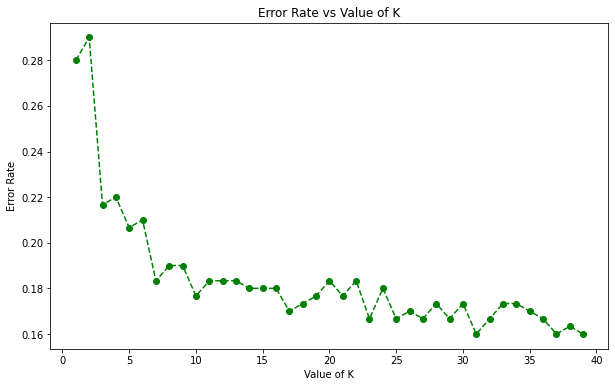

In [50]:
#lets visualize error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green', marker='o', linestyle='dashed')
plt.title('Error Rate vs Value of K',)
plt.xlabel('Value of K')
plt.ylabel('Error Rate')

In [52]:
#From above plot we can see that as the value of K increases our error rate is going down. At the K=32 or K=39 we have the lowest error rate
#Lets retrain the model with K=39

knn=KNeighborsClassifier(n_neighbors=39)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
#Lets evaluate our model i.e how well our model has performed
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       152
           1       0.82      0.86      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



[[125  27]
 [ 21 127]]


In [54]:
#Here we have improved our accuracy from 72$ to 84%

print('The accuracy of our model is- 84%')

The accuracy of our model is- 84%
